<a href="https://colab.research.google.com/github/SundharessB/Quantum-Computing/blob/main/QC_2348564_ETE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.1 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [3]:
pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.7 MB/s eta 0:00:00


In [11]:
!pip install pylatexenc

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector

In [12]:
circuit_1 = QuantumCircuit(3, 3)
circuit_1.h(0)
circuit_1.ccx(0,1,2)
display(circuit_1.draw(output='text'))

┌───┐     
q_0: ┤ H ├──■──
     └───┘  │  
q_1: ───────■──
          ┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

In [13]:
Statevector.from_instruction(circuit_1).draw('latex')

<IPython.core.display.Latex object>

### measurement

In [14]:
circuit_1.measure([0,1,2], [0,1,2]);
simulator = AerSimulator()
compiled_circuit = transpile(circuit_1, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit_1)

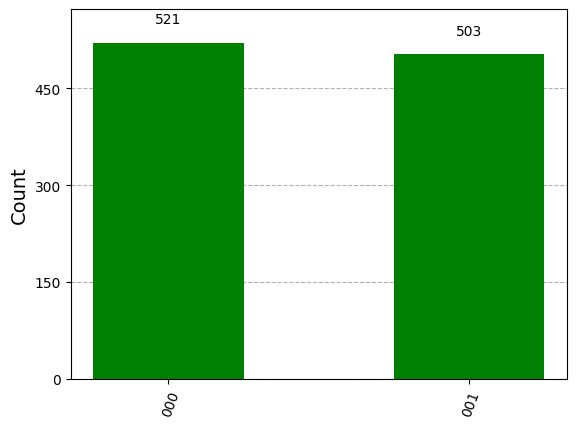

In [15]:
plot_histogram(counts, color='green')

###Probability

<ipython-input-16-8fe8c7ae7ead>:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circuit_1).result()


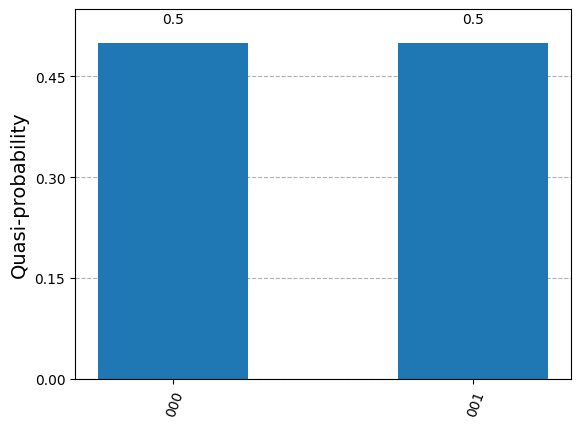

In [16]:
results = Sampler().run(circuit_1).result()
proba = results.quasi_dists[0].binary_probabilities()
plot_histogram(proba)

In [21]:
circuit_2 = QuantumCircuit(3,3)
circuit_2.h(0)
circuit_2.x(2)
circuit_2.cswap(0,1,2)
display(circuit_2.draw(output='text'))

┌───┐   
q_0: ┤ H ├─■─
     └───┘ │ 
q_1: ──────X─
     ┌───┐ │ 
q_2: ┤ X ├─X─
     └───┘   
c: 3/════════

In [22]:
Statevector.from_instruction(circuit_2).draw('latex')

<IPython.core.display.Latex object>

In [23]:
circuit_2.measure([0,1,2], [0,1,2]);
simulator = AerSimulator()
compiled_circuit = transpile(circuit_2, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit_2)

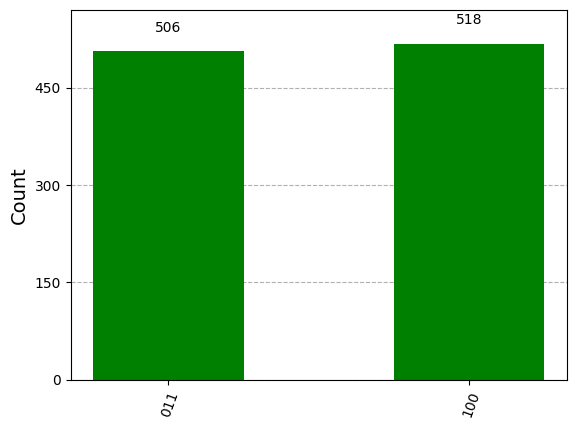

In [24]:
plot_histogram(counts, color='green')

<ipython-input-25-eea3c7ffdb1b>:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circuit_2).result()


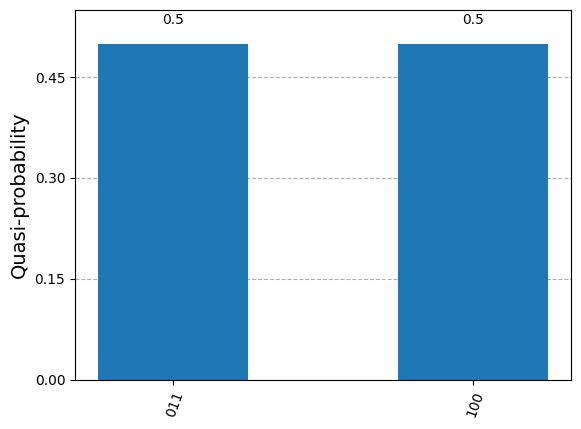

In [25]:
results = Sampler().run(circuit_2).result()
proba = results.quasi_dists[0].binary_probabilities()
plot_histogram(proba)

In [27]:
circuit_3 = QuantumCircuit(2, 2)
circuit_3.x(1)
circuit_3.h(0)
circuit_3.cx(0,1)
circuit_3.z(1)
circuit_3.cx(1,0)
circuit_3.h(1)
display(circuit_3.draw(output='text'))

┌───┐          ┌───┐     
q_0: ┤ H ├──■───────┤ X ├─────
     ├───┤┌─┴─┐┌───┐└─┬─┘┌───┐
q_1: ┤ X ├┤ X ├┤ Z ├──■──┤ H ├
     └───┘└───┘└───┘     └───┘
c: 2/═════════════════════════

In [28]:
Statevector.from_instruction(circuit_3).draw('text')

[ 0.00000000e+00+0.j,-2.23711432e-17+0.j, 0.00000000e+00+0.j,
  1.00000000e+00+0.j]

In [29]:
circuit_3.measure([0,1],[0,1]);
simulator = AerSimulator()
compiled_circuit = transpile(circuit_3, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit_3)

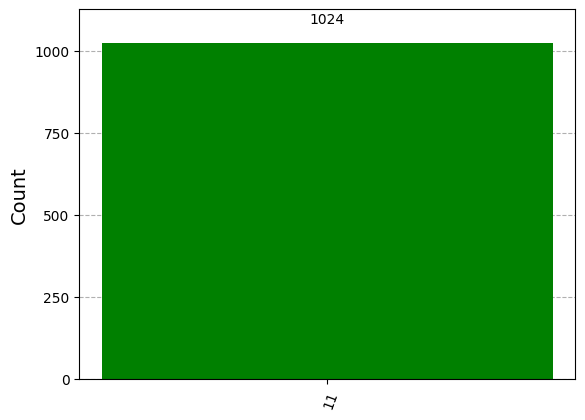

In [30]:
plot_histogram(counts, color='green')

<ipython-input-31-70577d864ba8>:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circuit_3).result()


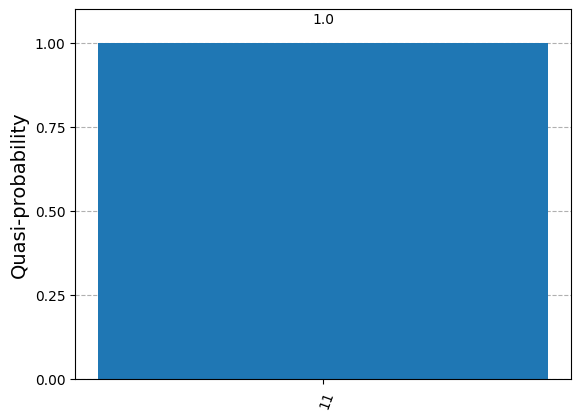

In [31]:
results = Sampler().run(circuit_3).result()
proba = results.quasi_dists[0].binary_probabilities()
plot_histogram(proba)

In [33]:
circuit_check = QuantumCircuit(1)
circuit_check.h(0)
circuit_check.s(0)
circuit_check.t(0)
display(circuit_check.draw(output='text'))

┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ T ├
   └───┘└───┘└───┘